# BÁO CÁO BÀI TẬP LẬP TRÌNH 1: HIỂU DỮ LIỆU  
## Môn học: Khai phá Dữ liệu (Data Mining)

---

## 👥 Thông tin nhóm:
1. **Họ và tên:** Lường Minh Trí  
   **Mã sinh viên:** 23020440  
   **Lớp:** K68A-AI2  

2. **Họ và tên:** Ngô Quang Dũng  
   **Mã sinh viên:** 23020344  
   **Lớp:** K68A-AI2  

3. **Họ và tên:** Kiều Đức Nam  
   **Mã sinh viên:** 23020404  
   **Lớp:** K68A-AI2  

**📊 Data set lựa chọn:**  
`[Simplize_VNM_FinancialIndicator_20250315, Simplize_VNM_PriceHistory_20250315]`
📅 **Thời gian thực hiện:** 2021–2025 (dữ liệu trong 5 năm gần đây)  
📈 **Nguồn dữ liệu:** Simplize.vn (bộ dữ liệu giá cổ phiếu & chỉ số tài chính)

> 🧭 *Mục tiêu cuối cùng:*  
> Hiểu rõ cách dữ liệu tài chính phản ánh hoạt động kinh doanh và biến động thị trường, đồng thời rèn luyện kỹ năng phân tích dữ liệu thực tế với Python.


### 1. Đọc dữ liệu 
- Dữ liệu được lấy từ nguồn Simplize.vn 
- Cung cấp dữ liệu trực quan sự thay đổi chỉ số tài chính (FinancialIndicator) và lịch sử giá (PriceHistory) của công ty Cổ phần Sữa Việt Nam từ năm 2021 cho đến 15/03/2025


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

price_path = "..\\data\\Simplize_VNM_PriceHistory_20250315.csv"
fin_path   = "..\\data\\Simplize_VNM_FinancialIndicator_20250315.csv"

# Đọc dữ liệu
price = pd.read_csv(price_path)
fin = pd.read_csv(fin_path)

print("=== PRICE HEAD ===")
print(price.head().T)
print("\n=== FIN HEAD ===")
print(fin.head().T)



=== PRICE HEAD ===
                        0           1          2          3          4
NGÀY           14/03/2025  13/03/2025  12/3/2025  11/3/2025  10/3/2025
GIÁ MỞ CỬA      62,400.00   62,300.00  62,500.00  62,300.00  63,000.00
GIÁ CAO NHẤT    62,700.00   62,900.00  62,800.00  62,500.00  63,000.00
GIÁ THẤP NHẤT   62,100.00   61,900.00  62,200.00  62,100.00  62,500.00
GIÁ ĐÓNG CỬA    62,100.00   62,000.00  62,200.00  62,400.00  62,500.00
THAY ĐỔI GIÁ       100.00     -200.00    -200.00    -100.00    -200.00
% THAY ĐỔI           0.00       -0.00      -0.00      -0.00      -0.00
KHỐI LƯỢNG        2696700     5100400    2755400    2287600    2529500

=== FIN HEAD ===
                             0                      1                    2                          3                        4
CHỈ TIÊU       Doanh thu thuần  Tăng trưởng doanh thu        Lợi nhuận gộp  Tăng trưởng lợi nhuận gộp  Lợi nhuận thuần từ HĐKD
Q4/2024  15,477,073,125,441.00                  -0.01 6,209,690,644,98

- Thông qua việc đọc và in ra 1 số dòng đầu của 2 bộ dữ liệu, thấy rằng trong bộ dữ liệu lịch sử giá có những Label quan trọng như: Giá mở cửa, giá cao nhất, giá thấp nhất,... . Đây là thông tin khá quan trọng cho việc hình dung bộ dữ liệu cũng như chuẩn bị xử lý sau này. 
- Ngoài ra bộ dữ liệu còn lại là FinancialIndicator nêu ra các yếu tố khác như doanh thu thuần, tăng trưởng doanh thu,... tính theo các quý trong năm.


# 2. Thực hiện tiền xử lí dữ liệu

### 2.1 Quan sát để hiểu doanh nghiệp và dữ liệu


#### Thực hiện thống kê miêu tả:
- Tính five-summary bao gồm: Giá trị nhỏ nhất(min) , tứ phân vị thứ nhất(Q1) ,trung vị ( median), phân vị thứ 2(Q2) , từ phân vị thứ ba (Q3), Giá trị lớn nhất (max)
- Ngoài ra, tính trung bình (average), trung vị(mean), độ lệch chuẩn (standard deviation), phương sai(variance)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.float_format', '{:,.2f}'.format)
# --- Thống kê cho Lịch sử giá ---
# Chuyển đổi cột ngày tháng sang định dạng datetime
price['NGÀY'] = pd.to_datetime(price['NGÀY'], format='%d/%m/%Y')

# Chọn các cột số để tính toán
price_numeric_cols = ['GIÁ MỞ CỬA', 'GIÁ CAO NHẤT', 'GIÁ THẤP NHẤT', 'GIÁ ĐÓNG CỬA', 'KHỐI LƯỢNG']
price_stats = price[price_numeric_cols].describe()
price_variance = price[price_numeric_cols].var().to_frame('Phương sai').T
price_summary = pd.concat([price_stats, price_variance])
print("--- Thống kê mô tả dữ liệu Lịch sử giá ---")
print(price_summary)

# --- Thống kê cho Chỉ số tài chính ---
# Chuyển cột 'CHỈ TIÊU' làm chỉ mục và chuyển vị (transpose) DataFrame
fin = fin.set_index('CHỈ TIÊU').T
for col in fin.columns:
    fin[col] = pd.to_numeric(fin[col], errors='coerce')

financial_summary = fin.describe()
print("\n--- Thống kê mô tả dữ liệu Chỉ số tài chính ---")
print(financial_summary)

--- Thống kê mô tả dữ liệu Lịch sử giá ---
              GIÁ MỞ CỬA  GIÁ CAO NHẤT  GIÁ THẤP NHẤT  GIÁ ĐÓNG CỬA           KHỐI LƯỢNG
count           1,000.00      1,000.00       1,000.00      1,000.00             1,000.00
mean           68,190.56     68,783.36      67,603.14     68,111.67         3,131,697.22
std             5,260.29      5,284.93       5,192.61      5,246.75         1,819,471.43
min            56,214.81     57,423.73      55,696.70     55,696.70           691,300.00
25%            64,018.15     64,495.34      63,611.65     63,992.72         1,932,900.00
50%            67,571.00     68,099.15      67,037.38     67,571.00         2,702,950.00
75%            72,110.90     72,710.85      71,477.98     72,051.66         3,882,825.00
max            86,174.49     86,174.49      84,277.83     84,690.15        21,564,900.00
Phương sai 27,670,701.21 27,930,451.27  26,963,152.25 27,528,360.66 3,310,476,277,282.17

--- Thống kê mô tả dữ liệu Chỉ số tài chính ---
CHỈ TIÊU       Doa

#### Sử dụng giá đóng cửa mỗi ngày trong bảng Lịch sử giá để làm giá cổ phiếu, sau đó vẽ biểu đồ theo dõi sự biến động giá cổ phiếu.

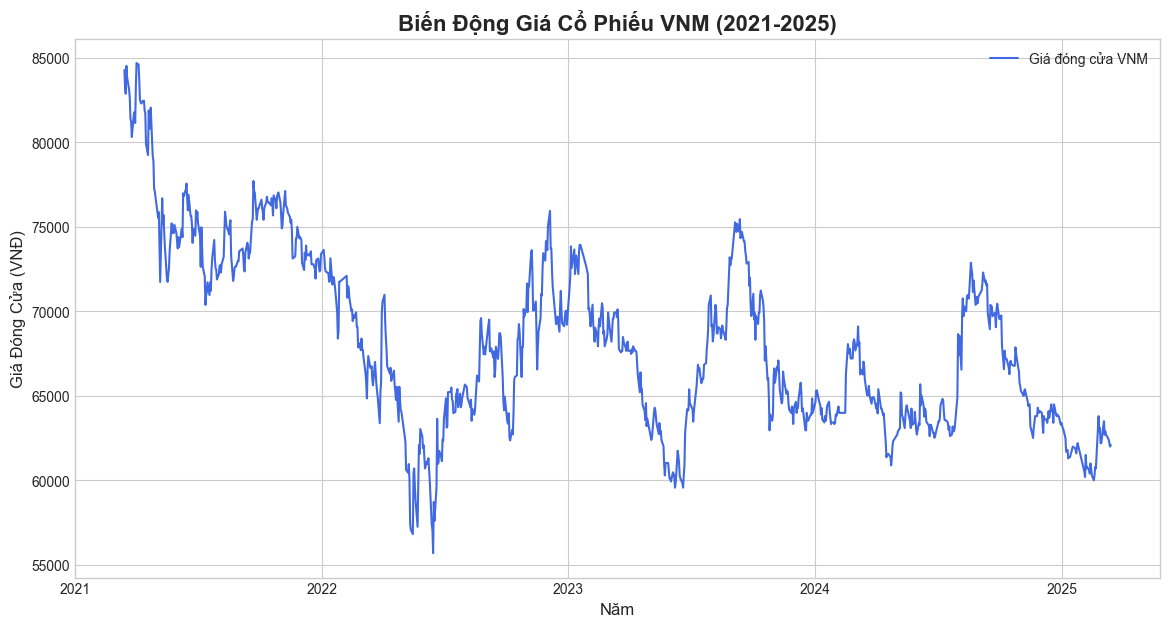

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Vẽ biểu đồ giá đóng cửa
ax.plot(price['NGÀY'], price['GIÁ ĐÓNG CỬA'], label='Giá đóng cửa VNM', color='royalblue')

# Định dạng biểu đồ
ax.set_title('Biến Động Giá Cổ Phiếu VNM (2021-2025)', fontsize=16, weight='bold')
ax.set_xlabel('Năm', fontsize=12)
ax.set_ylabel('Giá Đóng Cửa (VNĐ)', fontsize=12)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.grid(True)
plt.show()

##### Phân tích và nhận xét:
Quan sát biểu đồ: Thấy giá cổ phiếu VNM có xu hướng giảm dài hạn từ 2021 cho đến tận 2025
Đỉnh điểm là cuối 2022, con số thấp kỉ lục là khoảng hơn 55000 đồng cho 1 cổ phiếu. Sau dao động khá tích cực mỗi nửa năm. Cho đến thời điểm cuối cùng là khoảng 62000 VNĐ/ cổ phiếu, thấp hơn khá nhiều so với thời kỳ hoàng kim năm 2021.
Điều này có thể do những nguyên nhân sau:

Theo https://vnstockmarket.com/tai-sao-co-phieu-vnm-giam-manh/ nguyên nhân có thể do lượng tiêu thụ sữa vào khoảng thời gian cuối 2021 cho đến 2023 giảm. Một phần nguyên nhân của việc này là do đại dịch COVID-19. Tuy vào khoảng thời gian 2022, đại dịch đã được kiểm soát phần nào, thế nhưng các doanh nghiệp nói chung và lượng tiêu thụ sữa nói riêng đều bị ảnh hưởng.

Sau khoảng thời gian này, trong khi các đối thủ trong ngành sữa khác bắt đầu nổi lên như Masan Customer với những sản phẩm mới lạ, thu hút, Vinamilk vẫn giữ ý tưởng với những sản phẩm truyền thống, việc này khiến cho khả năng cạnh tranh của công ty này suy giảm. Từ đó kéo theo những câu hỏi về sự phát triển của công ty VNM trên thị trường. Khiến cho từ cổ phiếu của Vinamilk ( vốn đang trong thời kì hoàng kim, được kỳ vọng mạnh mẽ) bắt đầu có dấu hiệu tụt dốc.

Một lý do khác có thể kể đến là từ cuối 2021, cố phiếu của VNM đã vào giai đoạn hợp lý, khi mà vốn dĩ cố phiếu của công ty thuộc loại cổ phiếu phòng thủ (loại cổ phiếu cho đồ dùng thiết yếu, là sự lựa chọn an toàn khi mà thị trường biến động mạnh bởi vì những cổ phiếu thường có xu hướng dao động nhẹ qua thời gian). Với việc từ thời gian trước đó cho đến 2021 là thời kỳ hoàng kim với giá cổ phiếu lên tới hơn 100000 VNĐ/ 1 cổ phiếu,qua khoảng thời gian này VNM giờ đây chỉ trở về vị trí vốn có của nó mà thôi. 

## 3. Tiền xử lý dữ liệu 
- Tại bước này, gộp 2 bảng dữ liệu gốc thành 1 bảng để có tính toán dễ dàng hơn.
- Cột mới sẽ bao gồm:
+ Lấy từ bảng Lịch sử giá : Mốc thời gian ( quý/năm) , Giá đóng cửa, Thay đỏi giá, % Thay đổi. 
*Chú thích: Dữ liệu từ bảng lịch sử giá sẽ được tính lại cho phù hợp với bảng chỉ số tài chính tránh nhầm lẫn khi gộp 2 bảng.
+ Lấy từ bảng chỉ số tài chính: Biên lợi nhuận gộp, Biên lợi nhuận ròng, P/E (tỷ lệ giá trên lợi nhuân Price to Earnings Ratio), EPS ( lợi nhuận trên mỗi cổ phiếu Earning Per Share), Tăng trưởng EPS,ROE(tỷ suất sinh lời trên vốn chủ sở hữu), tỷ lệ Nợ phải trả/Vốn chủ sở hữu, Khả năng thanh toán tổng quát, Vòng quay tài sản (Asset turnover ratio), Giá trị sổ sách (Book value per Share). Đây đều các chỉ số có khả năng ảnh hưởng tới giá cổ phiếu.
- Các số liệu của mỗi hàng sẽ là:
+ Dữ liệu theo quý đó trong Báo cáo Chỉ số tài chính của công ty. 
+ Đối với lịch sử giá: tính trung bình dữ liệu của ngày cuối cùng của quý đó và 14 ngày trước và sau ngày đó. 
- Mỗi hàng là các chỉ số trong một quý



In [17]:
# --- Chuẩn bị dữ liệu tài chính ---
required_cols = [
    'Biên lợi nhuận gộp', 'Biên lợi nhuận ròng', 'P/E', 'EPS (VNĐ/CP)',
    'Tăng trưởng EPS', 'ROE LTM', 'Nợ phải trả / Vốn chủ sở hữu',
    'Khả năng thanh toán tổng quát', 'Vòng quay tài sản (vòng)',
    'Giá trị sổ sách (VNĐ/CP)'
]
df_quarterly_finance = fin[required_cols].copy()

# Chuyển đổi chỉ mục Quý/Năm thành ngày cuối quý
def convert_quarter_to_date(q_str):
    quarter, year = q_str.split('/')
    if quarter == 'Q1':
        return pd.to_datetime(f'{year}-03-31')
    elif quarter == 'Q2':
        return pd.to_datetime(f'{year}-06-30')
    elif quarter == 'Q3':
        return pd.to_datetime(f'{year}-09-30')
    elif quarter == 'Q4':
        return pd.to_datetime(f'{year}-12-31')
df_quarterly_finance['end_of_quarter'] = df_quarterly_finance.index.to_series().apply(convert_quarter_to_date)

# --- Tính toán dữ liệu giá theo quý ---
price_data_for_quarter = []
for date in df_quarterly_finance['end_of_quarter']:
    start_date = date - pd.Timedelta(days=14)
    end_date = date + pd.Timedelta(days=14)
    
    # Lọc các ngày trong khoảng thời gian
    mask = (price['NGÀY'] >= start_date) & (price['NGÀY'] <= end_date)
    price_subset = price.loc[mask]

    # Tính trung bình giá đóng cửa
    avg_price = price_subset['GIÁ ĐÓNG CỬA'].mean()
    price_data_for_quarter.append(avg_price)

df_quarterly_finance['Giá đóng cửa quý'] = price_data_for_quarter

df_quarterly_finance['Thay đổi giá'] = df_quarterly_finance['Giá đóng cửa quý'].diff()
df_quarterly_finance['% thay đổi'] = df_quarterly_finance['Giá đóng cửa quý'].pct_change(fill_method=None) * 100

final_df = df_quarterly_finance.reset_index().rename(columns={'index': 'Quý'})
final_df = final_df.drop(columns=['end_of_quarter']) # Bỏ cột phụ

print("--- 5 dòng đầu của bộ dữ liệu mới theo quý ---")
print(final_df.head().to_markdown(index=False, floatfmt=".2f"))

--- 5 dòng đầu của bộ dữ liệu mới theo quý ---
| Quý     |   Biên lợi nhuận gộp |   Biên lợi nhuận ròng |   P/E |   EPS (VNĐ/CP) |   Tăng trưởng EPS |   ROE LTM |   Nợ phải trả / Vốn chủ sở hữu |   Khả năng thanh toán tổng quát |   Vòng quay tài sản (vòng) |   Giá trị sổ sách (VNĐ/CP) |   Giá đóng cửa quý |   Thay đổi giá |   % thay đổi |
|:--------|---------------------:|----------------------:|------:|---------------:|------------------:|----------:|-------------------------------:|--------------------------------:|---------------------------:|---------------------------:|-------------------:|---------------:|-------------:|
| Q4/2024 |                 0.40 |                  0.14 | 14.16 |        1016.12 |             -0.09 |      0.27 |                           0.52 |                            2.92 |                       0.27 |                   15444.74 |           63009.81 |         nan    |       nan    |
| Q3/2024 |                 0.41 |                  0.15 | 15.69 |     

# 3. Lựa chọn các yếu tố nguy cơ tiềm năng

- Tại phần này, sử dụng độ tương quan Pearson của các chỉ số tài chính với giá cổ phiếu đã được tính ở mục 2. 
- Từ đó suy ra được rằng mối liên kết giữa các chỉ số tài chính và và giá cố phiếu tại thời điểm đó 

##### Giải thích về độ tương quan và vai trò của nó đối với risk factors của 1 công ty.
- Độ tương quan ( kí hiệu là *r* ) : dùng để lượng hoá mức độ chặt chẽ của mối liên hệ tuyến tính giữa hai biến định lượng.
- Bằng cách tính độ tương quan Pearson giữa các chỉ số tài chính và giá cổ phiếu tại một thời điểm, ta có thể biết được độ quan trọng của chỉ số đó đối với giá cả phiếu đồng thời nhận biết được nếu những chỉ số nãy mà thay đổi thì giá cố phiếu sẽ thế nào.
- Trong bài này, công thức tính độ tương quan Pearson có thể được viết như sau:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \cdot \sum (Y_i - \bar{Y})^2}}
$$

##### Trong đó:

- $X_i$: Giá trị của biến tài chính tại quý thứ *i* (ví dụ: EPS, ROE, P/E…)
- $Y_i$: Giá cổ phiếu tại quý thứ *i*
- $\bar{X}$: Giá trị trung bình của biến $X$ trong toàn bộ các quý
- $\bar{Y}$: Giá trị trung bình của giá cổ phiếu $Y$
- $r$: Hệ số tương quan Pearson, nằm trong khoảng $-1 \le r \le 1$


##### Ý nghĩa giá trị của hệ số tương quan:
- Khi bỏ qua phần kiểm định thống kê (việc mà ta phải xét trong trường hợp thực tế với rất nhiều yếu tố bên ngoài), hệ số tương quan Pearson có thể được hiểu như sau:

- **Nếu \( r > 0 \)**:  
  → *Tương quan dương*  
  → Khi chỉ số tài chính tăng, giá cổ phiếu có xu hướng **tăng theo**

- **Nếu \( r < 0 \)**:  
  → *Tương quan âm*  
  → Khi chỉ số tài chính tăng, giá cổ phiếu có xu hướng **giảm**

- **Nếu \( |r| > 0.7 \)**:  
  → *Tương quan mạnh*  
  → Chỉ số tài chính có **ảnh hưởng lớn**, đóng vai trò **yếu tố then chốt** tới giá cổ phiếu

- **Nếu \( 0.3 < |r| < 0.7 \)**:  
  → *Tương quan trung bình*  
  → Chỉ số tài chính **có ảnh hưởng**, nhưng **không phải yếu tố quyết định**

- **Nếu \( |r| < 0.3 \)**:  
  → *Tương quan yếu*  
  → Chỉ số tài chính **gần như không ảnh hưởng**, tác động không đáng kể tới giá cổ phiếu


Theo đó, ta vẽ ma trận tương quan như sau:

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển Series thành DataFrame để vẽ
df_corr_plot.columns = ['CHỈ TIÊU', 'Giá đóng cửa quý']

# Loại bỏ chính mình (tránh cột 'Giá đóng cửa quý' so với chính nó)
df_corr_plot = df_corr_plot[df_corr_plot['CHỈ TIÊU'] != 'Giá đóng cửa quý']

# Sắp xếp theo giá trị tương quan
df_corr_plot = df_corr_plot.sort_values(by='Giá đóng cửa quý', ascending=True)
print(df_corr_plot)


                         CHỈ TIÊU  Giá đóng cửa quý
12       Giá trị sổ sách (VNĐ/CP)             -0.49
11  Khả năng thanh toán tổng quát             -0.41
10                Tăng trưởng EPS             -0.30
9        Vòng quay tài sản (vòng)             -0.02
8    Nợ phải trả / Vốn chủ sở hữu              0.37
7                    EPS (VNĐ/CP)              0.47
6              Biên lợi nhuận gộp              0.56
5                      % thay đổi              0.63
4             Biên lợi nhuận ròng              0.64
3                    Thay đổi giá              0.66
2                             P/E              0.70
1                         ROE LTM              0.73


Vẽ biểu đồ để có góc nhìn trực quan hơn

C:\Users\Admin\AppData\Local\Temp\ipykernel_24992\1542587469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


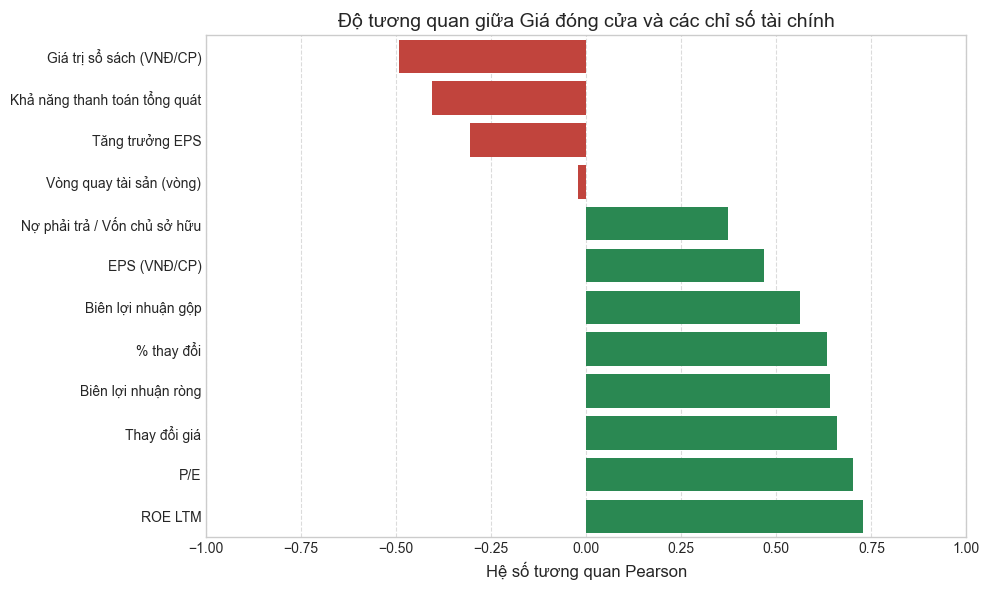

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Giá đóng cửa quý', 
    y='CHỈ TIÊU', 
    data=df_corr_plot, 
    palette=['#d73027' if x < 0 else '#1a9850' for x in df_corr_plot['Giá đóng cửa quý']]
)

plt.title('Độ tương quan giữa Giá đóng cửa và các chỉ số tài chính', fontsize=14)
plt.xlabel('Hệ số tương quan Pearson', fontsize=12)
plt.ylabel('')
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Như vậy, có thể thấy được có 4 chỉ số tài chính có xu hướng chuyển dịch ngược so với giá cổ phiếu, hay nói cách khác khi 4 đại lượng này: Giá trị sổ sách ( VNĐ/CP), Khả năng thanh toán tổng quát, tăng trưởng EPS và vòng quay tài sản(vòng) thấp thì giá cổ phiếu của công ty sẽ tăng và ngược lại nếu giá trị của 4 đại lượng này cao thì giá cổ phiếu sẽ giảm. 
- Cũng như vậy, ta có thể thấy được các đại lượng còn lại bao gồm: Nợ phải trả/Vốn chủ sở hữu, EPS(VNĐ\CP), Biên lợi nhuận gộp, % Thay đổi, Biên lợi nhuận rồng, thay đổi giá, P/E, ROE LTM chuyển dịch cùng hướng với giá cổ phiếu. Tức cùng tăng hoặc cùng giảm với giá cổ phiếu. 
- Ngoài ra, trong khi đa phần đại lượng đều ảnh hưởng khá đáng kể so với giá cổ phiếu (khoảng 0.5 đến 0.75) theo hướng nghịch hoặc thuận, thì vòng quay tài sản ( vòng) lại ảnh hưởng khá ít.
- Tuy nhiên, ta không thể quy ra rằng chỉ cần giảm những chỉ số tài chính có độ tương quan thấp hơn 0 hoặc tăng những chỉ số tài chính có độ tương quan cao hơn 0 là ta có thể kiểm soát được giá cổ phiếu.
- Trên thực tế, những yếu tố bên ngoài ảnh hưởng rất nhiều đánh sự lên xuống của chúng, khiến cho các công ty không thể chủ động điều chỉnh các chỉ số này tuỳ ý. Một yếu tố quan trọng khá là độ tương quan giữa các chỉ số với nhau, điều này làm khi công ty thay đổi 1 chỉ số nào đó, các chỉ số khác cũng thay đổi theo với mức độ tuỳ thuộc theo độ tương quan. Khiến cho sự ảnh hưởng của giá cổ phiếu khá khó đoán, nhất là với các công ty có nhiều chỉ số tài chính.

- Ta vẽ ma trận tương quan của bộ dữ liệu.

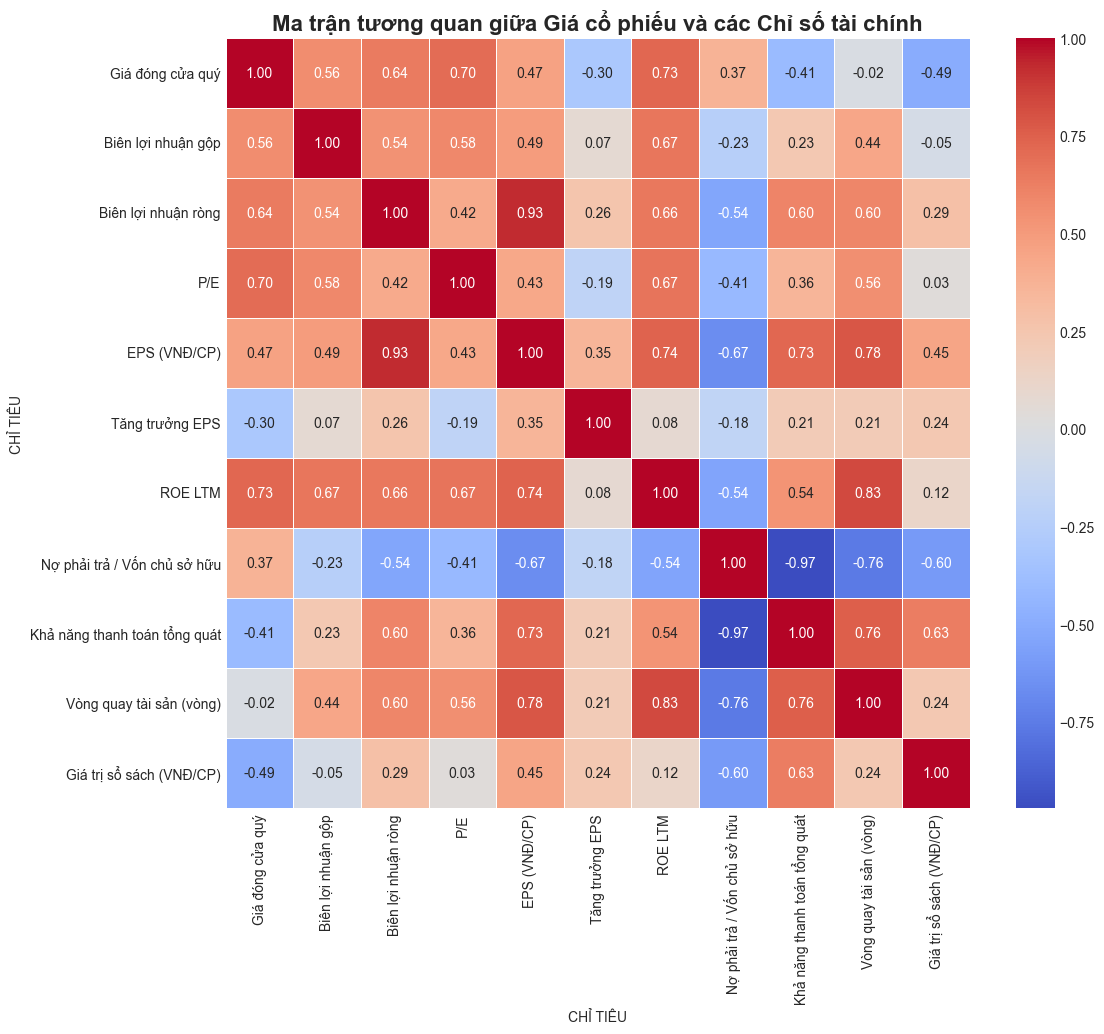

In [20]:
# Chọn các cột số để tính tương quan
correlation_cols = [
    'Giá đóng cửa quý', 'Biên lợi nhuận gộp', 'Biên lợi nhuận ròng', 'P/E', 
    'EPS (VNĐ/CP)', 'Tăng trưởng EPS', 'ROE LTM', 'Nợ phải trả / Vốn chủ sở hữu',
    'Khả năng thanh toán tổng quát', 'Vòng quay tài sản (vòng)', 'Giá trị sổ sách (VNĐ/CP)'
]
correlation_matrix = final_df[correlation_cols].corr()

# Vẽ biểu đồ nhiệt (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Ma trận tương quan giữa Giá cổ phiếu và các Chỉ số tài chính', fontsize=16, weight='bold')
plt.show()

- Trong bảng, các ô càng đỏ thì độ tương quan giữa 2 chỉ số tạo thành càng cao, và ngược lại, các ô càng xanh thì độ tương quan càng thấp. 
- Ví dụ trong dữ liệu của VNM, EPS(VNĐ/CP) và biên lợi nhuận ròng có độ tương khá cao (0.93). Đồng thời, 2 chỉ số này cũng có độ tương quan đều lớn hơn 0.5 đối với giá cổ phiếu, vậy nên có thể nói rằng cổ phiếu của VNM sẽ tăng nếu có thể làm tăng EPS và biên lợi nhuận ròng. 